<a href="https://colab.research.google.com/github/GiuseppeQ26/Examen_final_Python_CTIC/blob/main/Examen_final_python_Intermedio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **EXAMEN FINAL PYTHON INTERMEDIO**

ALUMNO: GIUSEPPE ANSELMO QUEIROLO ANTON


Pregunta 1.

PEP 8 es una guía con un conjunto de lineamientos y estilos para escribir codigo en Python y que estan diseñadas para mejorar la legibilidad y consistencia del código. PEP significa Python Enhancement Proposal (Propuesta de mejora de Python) y algunos ejemplos de su uso son:  

*   Los nombres de variables y funciones deben estar en minúsculas con las palabras separadas con guiones bajos.
*   Los operadores binarios deben estar rodeados con un solo espacio a cada lado.
*   Usar comentarios para explicar que hace el código pero evitando escribir comentarios que simplemente repitan lo que esta haciendo el código.


In [6]:
## PREGUNTA 2
!python costo_servicio.py -h

usage: costo_servicio.py
       [-h]
       [--animal ANIMAL]
       [--tratamiento TRATAMIENTO]

optional arguments:
  -h, --help
    show this
    help
    message and
    exit
  --animal ANIMAL
    Tipo de
    animal para
    el
    tratamiento
  --tratamiento TRATAMIENTO
    Tipo de
    tratamiento
    o servicio


In [1]:
## PREGUNTA 2 
!python costo_servicio.py --animal 'perro' --tratamiento 'corte de pelo'

El costo de corte de pelo para un perro es de 30

In [3]:
!python costo_servicio.py --animal 'gato' --tratamiento 'desparasitación'

El costo de desparasitación para un gato es de 35

In [4]:
!python costo_servicio.py --animal 'conejo' --tratamiento 'corte de pelo'

El costo de corte de pelo para un conejo es de 15

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

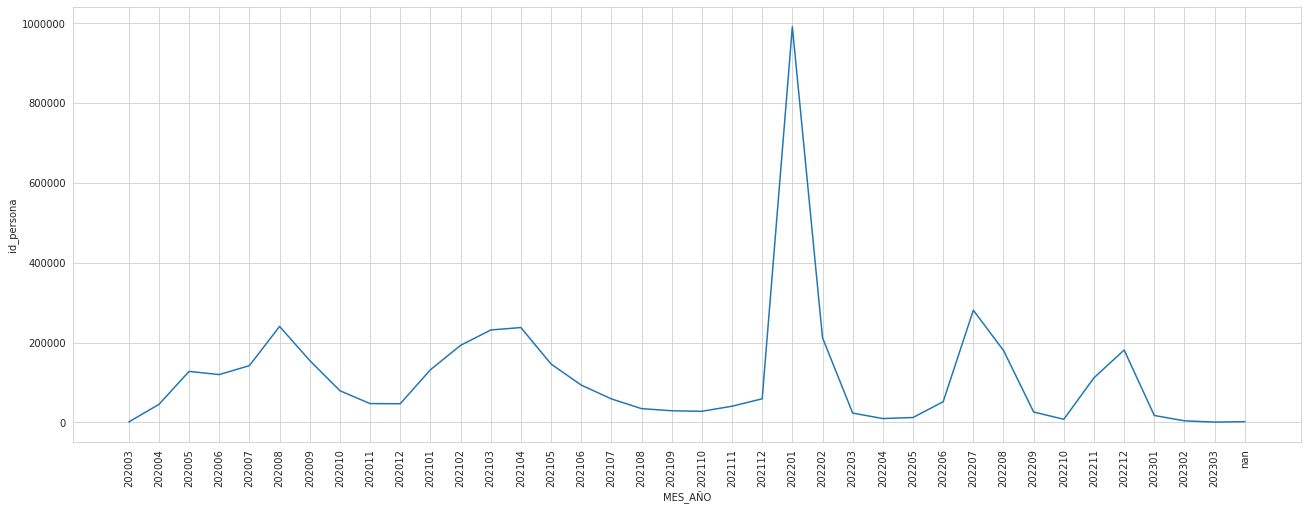

In [13]:
## PREGUNTA 3

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

covid_positivos = pd.read_csv('positivos_covid.csv', delimiter = ';')
covid_positivos['MES_AÑO'] = covid_positivos.FECHA_RESULTADO.apply(lambda x: str(x)[:6])
df = covid_positivos.groupby("MES_AÑO")[["id_persona"]].aggregate(['count']).reset_index()
df.columns = df.columns.droplevel(-1)

sns.set_style('whitegrid')
plt.ticklabel_format(style='plain', axis='y')
plt.rcParams["figure.figsize"] = (22,8)
sns.lineplot(x="MES_AÑO", y="id_persona", data=df)
plt.xticks(rotation=90)


In [8]:
df.head()

,MES_AÑO,id_persona
0,202003,1195
1,202004,45235
2,202005,127840
3,202006,119880
4,202007,142388


In [ ]:
covid_positivos['MES_AÑO'] = pd.to_datetime(covid_positivos['MES_AÑO'], format='%Y%m')

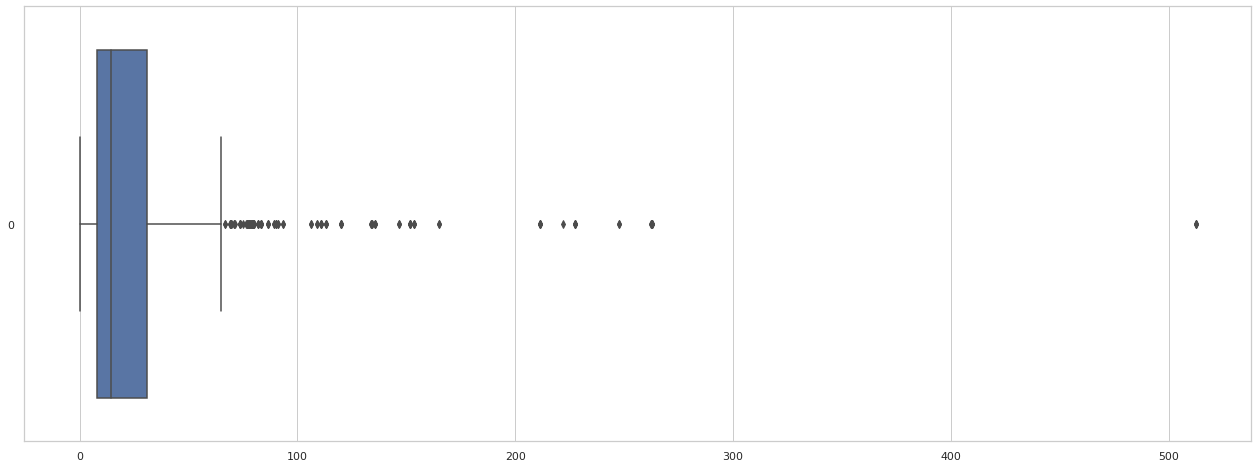

In [50]:
## PREGUNTA 4.

df_titanic = pd.read_csv('train_titanic.csv')
sns.set_theme(style="whitegrid")
bp = sns.boxplot(data= df_titanic["Fare"], orient="h")

In [51]:
q1, q3 = df_titanic["Fare"].quantile([0.25, 0.75])
riq = q3 - q1
limite_inferior = q1 - 1.5 * riq
limite_superior = q3 + 1.5 * riq

outliers = df_titanic["Fare"][(df_titanic["Fare"] < limite_inferior) | (df_titanic["Fare"] > limite_superior)]
outliers.count()

116

In [52]:
limite_superior

65.6344

In [53]:
## Se observan 116 outliers del gráfico obtenido y se recomendaría hacer una limpieza de outliers

df_titanic["Fare_t"] = df_titanic.Fare.apply(lambda x: limite_superior if x > limite_superior else x)


In [54]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_t
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,65.6344
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.0500


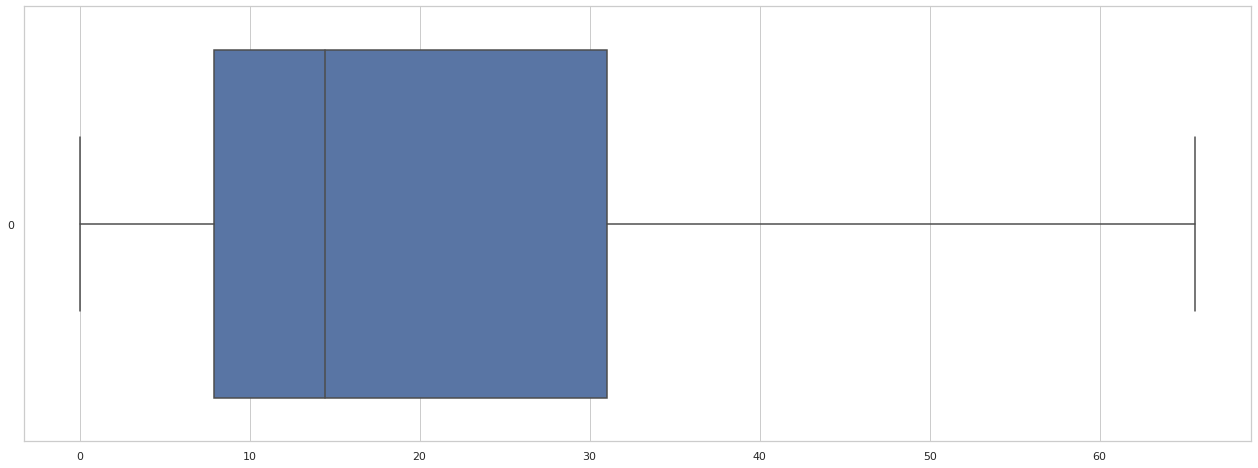

In [55]:
## El boxplot sin outliers quedaría de la siguiente forma 

sns.set_theme(style="whitegrid")
bp = sns.boxplot(data= df_titanic["Fare_t"], orient="h")